In [2]:
import pandas as pd

In [3]:
import matplotlib as mpl

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns

In [70]:
df = pd.read_excel("Base.xlsx")

In [71]:
df

,Estado,X,Y,Z
0,A,28,302,99
1,A,44,206,140
2,B,75,677,144
3,C,30,308,73
4,D,48,936,56
5,E,0,791,78
6,H,22,714,118
7,H,34,209,111
8,L,50,883,122
9,W,29,598,144


# Setup

In [16]:
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

# Correlação

# Scatter plot

In [29]:
categories = np.unique(df['Estado']) #Estado é variavel da base
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

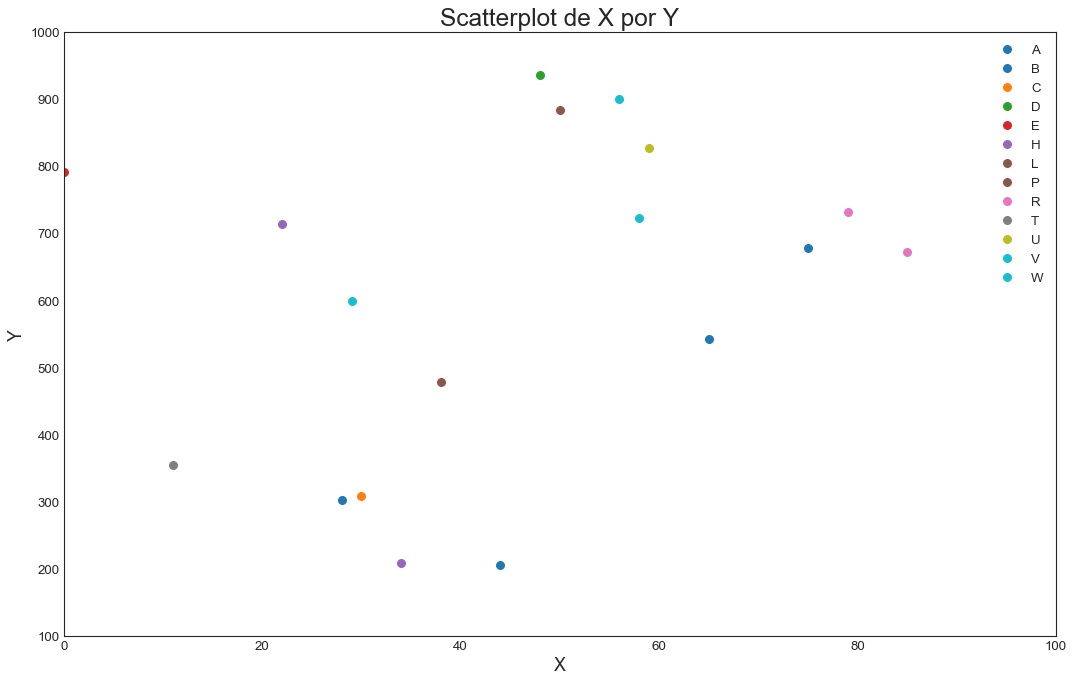

In [38]:
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
for i, category in enumerate(categories):
    plt.scatter('X', 'Y', #nomes das variáveis
                data=df.loc[df.Estado==category, :],  #Estado é variavel da base
                s=50, c=colors[i], label=str(category))
plt.gca().set(xlim=(0.0, 100), ylim=(100, 1000), #Necessario ajustar os limites dos eixos (xlim e ylim)
              xlabel='X', ylabel='Y') #nome das variaveis em cada eixo
plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Scatterplot de X por Y", fontsize=22) #titulo do eixo
plt.legend(fontsize=12)    
plt.show()

# Bubble plot com destaque

In [72]:
from scipy.spatial import ConvexHull
from matplotlib import patches
sns.set_style("white")

In [73]:
def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)

In [74]:
categories = np.unique(df['Estado']) #Estado é variável da base
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

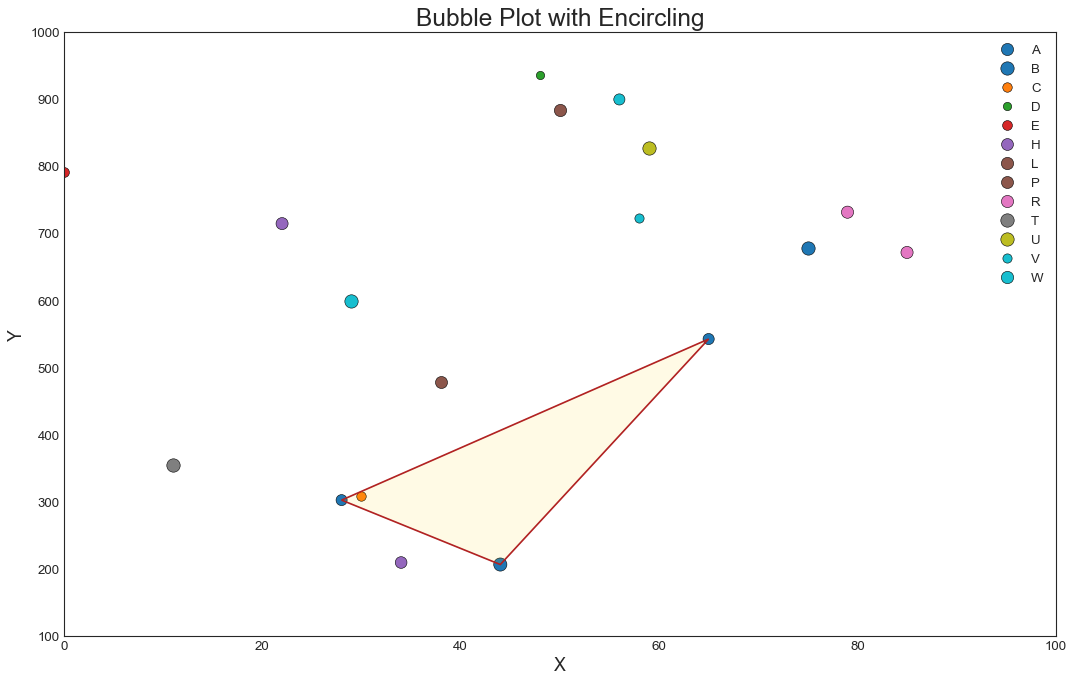

In [92]:
fig = plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
for i, category in enumerate(categories):
    plt.scatter('X', 'Y', data=df.loc[df.Estado==category, :], s='Z', #Estado é variável da base
                c=colors[i], label=str(category), edgecolors='black', linewidths=.5)
df_encircle_data = df.loc[df.Estado=='A',:] #colocar qual categoria da variável sera colocada em destaque (df.variavel == 'categoria')
encircle(df_encircle_data.X, df_encircle_data.Y, ec="k", fc="gold", alpha=0.1) #X e Y são variaveis da base
encircle(df_encircle_data.X, df_encircle_data.Y, ec="firebrick", fc="none", linewidth=1.5) #idem ao acima
plt.gca().set(xlim=(0.0, 100), ylim=(100, 1000), #colocar limites dos eixos xlim e ylim
              xlabel='X', ylabel='Y') #colocar cada variavel em um eixo
plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Bubble Plot with Encircling", fontsize=22) #titulo do grafico
plt.legend(fontsize=12)    
plt.show()

# Scatter plot com linha de tendência (reg linear cm melhor ajuste)

In [93]:
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")
df_select = df.loc[df.cyl.isin([4,8]), :]

In [95]:
df_select.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
7,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact


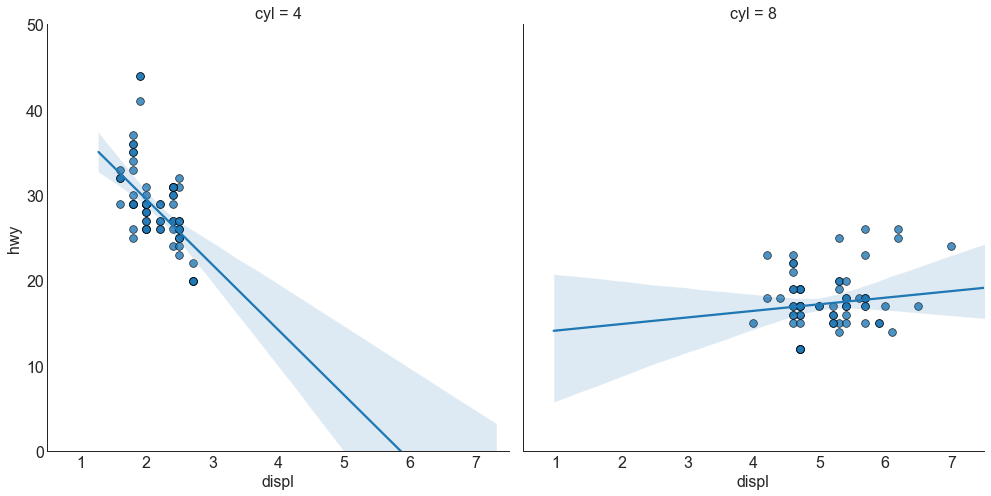

In [116]:
sns.set_style("white")
gridobj = sns.lmplot(x="displ", y="hwy", #displ e hwy sao variaveis da base
                     data=df_select, 
                     height=7, 
                     robust=True, 
                     palette='Set1', 
                     col="cyl", #cyl é variavel da base
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))
gridobj.set(xlim=(0.5, 7.5), ylim=(0, 50)) #colocar limites de cada variavel xlim e ylim
plt.show()

# Histograma Marginal

In [97]:
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


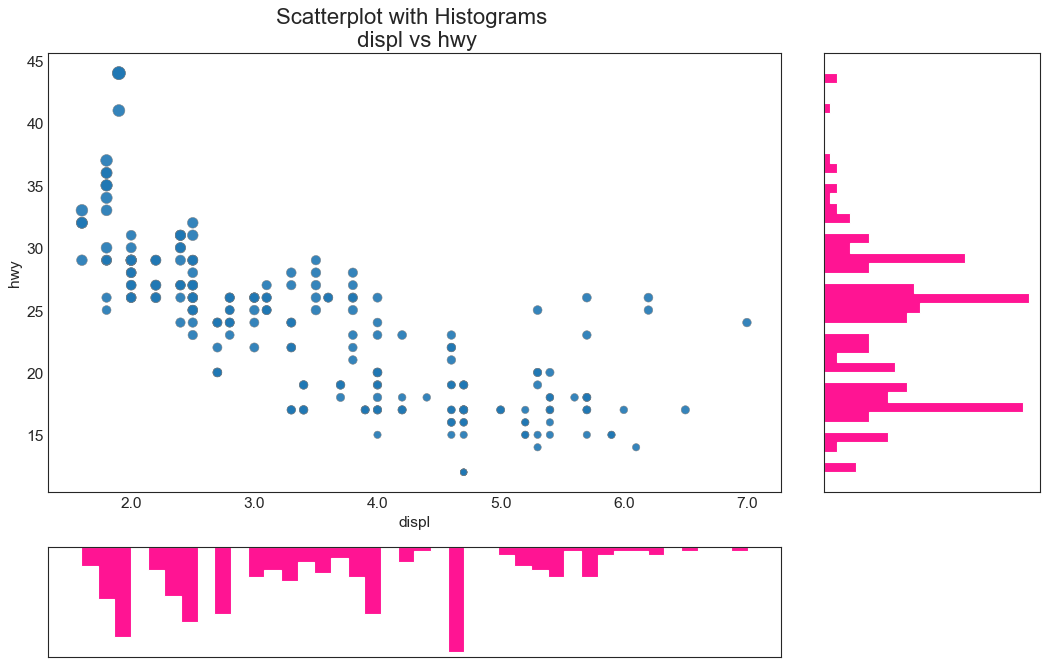

In [99]:
fig = plt.figure(figsize=(16, 10), dpi= 80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])
#disply e hwy são variaveis da base#
ax_main.scatter('displ', 'hwy', s=df.cty*4, alpha=.9, data=df, cmap="tab10", edgecolors='gray', linewidths=.5)
ax_bottom.hist(df.displ, 40, histtype='stepfilled', orientation='vertical', color='deeppink') #displ é variavel da base
ax_bottom.invert_yaxis()
ax_right.hist(df.hwy, 40, histtype='stepfilled', orientation='horizontal', color='deeppink') #hwy é variavel da base
ax_main.set(title='Scatterplot with Histograms \n displ vs hwy', xlabel='displ', ylabel='hwy') #dispor cada variavel em um eixo
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)
xlabels = ax_main.get_xticks().tolist()
ax_main.set_xticklabels(xlabels)
plt.show()

# Boxplot Marginal

In [101]:
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


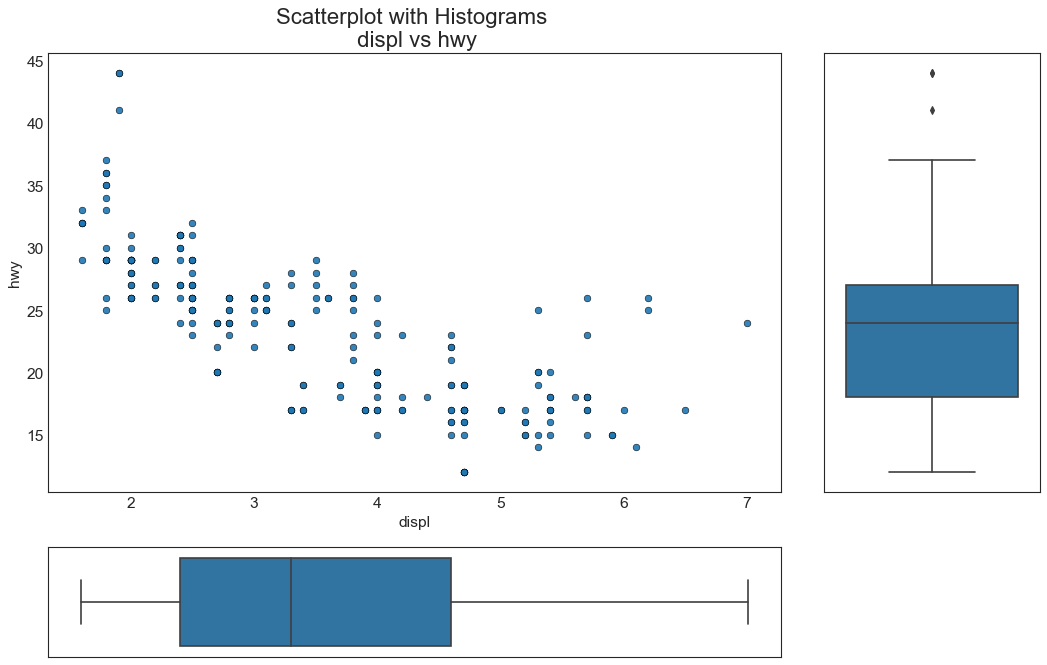

In [102]:
fig = plt.figure(figsize=(16, 10), dpi= 80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])
#displ e hwy sao variaveis da base
ax_main.scatter('displ', 'hwy', alpha=.9, data=df, cmap="Set1", edgecolors='black', linewidths=.5)
sns.boxplot(df.hwy, ax=ax_right, orient="v") #hwy é variavel da base
sns.boxplot(df.displ, ax=ax_bottom, orient="h") #displ é variavel da base
ax_bottom.set(xlabel='')
ax_right.set(ylabel='')
ax_main.set(title='Scatterplot with Histograms \n displ vs hwy', xlabel='displ', ylabel='hwy') #titulo do grafico e disposicao de cada variavel em um eixo
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)
plt.show()

# Correlação entre variaveis quantitativas

In [107]:
df = pd.read_excel("Base.xlsx")
df.head()

,Estado,X,Y,Z
0,A,28,302,99
1,A,44,206,140
2,B,75,677,144
3,C,30,308,73
4,D,48,936,56


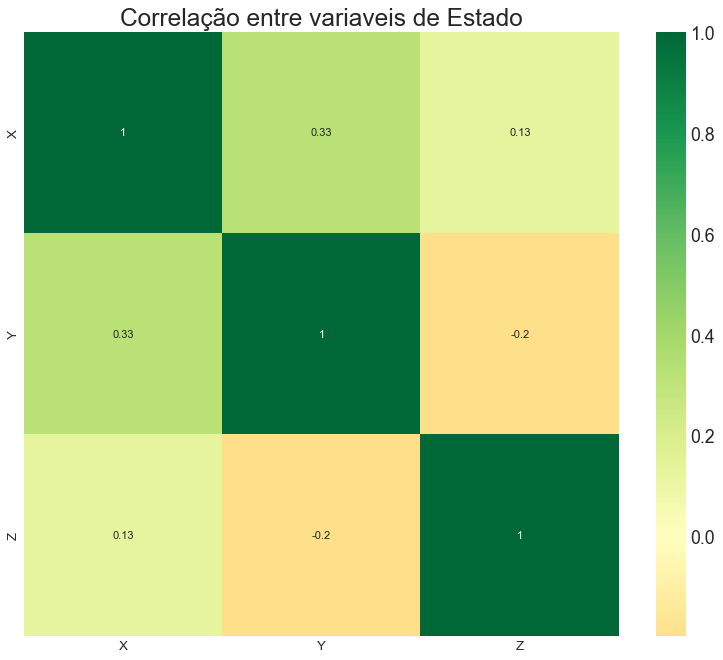

In [109]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Correlação entre variaveis de Estado', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Pairwise Plot

In [111]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Figure size 800x640 with 0 Axes>

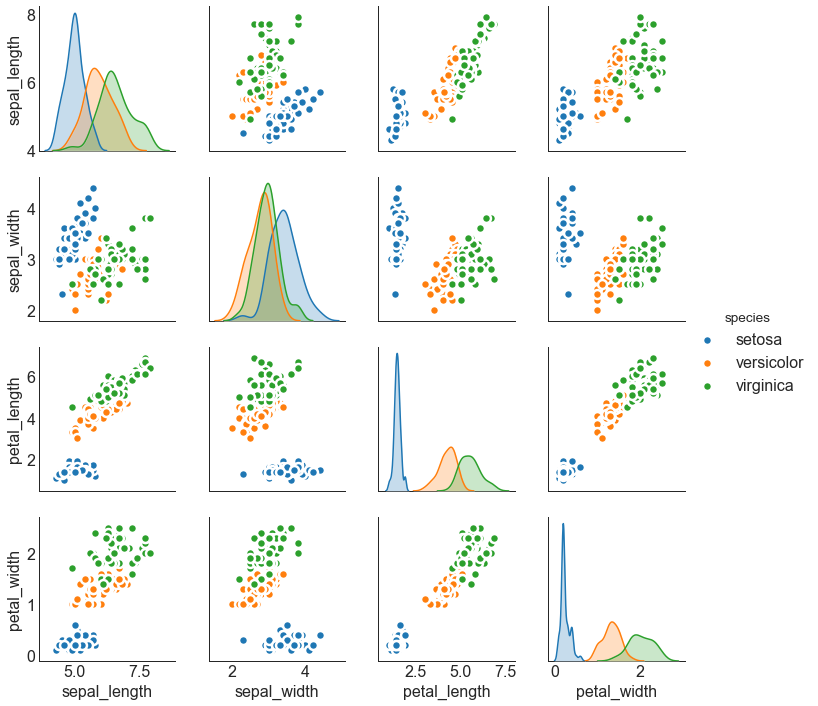

In [113]:
plt.figure(figsize=(10,8), dpi= 80)
# species é uma variavel da base
sns.pairplot(df, kind="scatter", hue="species", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

<Figure size 800x640 with 0 Axes>

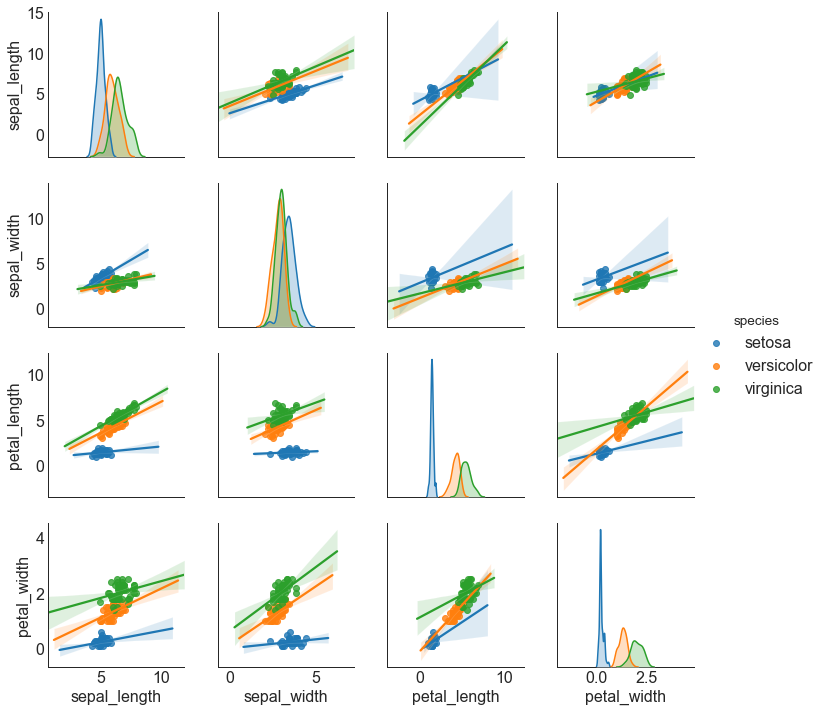

In [114]:
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df, kind="reg", hue="species")
plt.show()

# Barras de Dispersão

In [7]:
#Preparação dos Dados
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")
print(df)
#Produção de um gráfico que plota o Z score dos dados

         mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  carb  fast  \
0   4.582576    6  160.0  110  3.90  2.620  16.46   0   1     4     4     1   
1   4.582576    6  160.0  110  3.90  2.875  17.02   0   1     4     4     1   
2   4.774935    4  108.0   93  3.85  2.320  18.61   1   1     4     1     1   
3   4.626013    6  258.0  110  3.08  3.215  19.44   1   0     3     1     1   
4   4.324350    8  360.0  175  3.15  3.440  17.02   0   0     3     2     1   
5   4.254409    6  225.0  105  2.76  3.460  20.22   1   0     3     1     1   
6   3.781534    8  360.0  245  3.21  3.570  15.84   0   0     3     4     0   
7   4.939636    4  146.7   62  3.69  3.190  20.00   1   0     4     2     1   
8   4.774935    4  140.8   95  3.92  3.150  22.90   1   0     4     2     1   
9   4.381780    6  167.6  123  3.92  3.440  18.30   1   0     4     4     1   
10  4.219005    6  167.6  123  3.92  3.440  18.90   1   0     4     4     1   
11  4.049691    8  275.8  180  3.07  4.070  17.40   

In [9]:
x = df.loc[:, ['mpg']]
print(x)

         mpg
0   4.582576
1   4.582576
2   4.774935
3   4.626013
4   4.324350
5   4.254409
6   3.781534
7   4.939636
8   4.774935
9   4.381780
10  4.219005
11  4.049691
12  4.159327
13  3.898718
14  3.224903
15  3.224903
16  3.834058
17  5.692100
18  5.513620
19  5.822371
20  4.636809
21  3.937004
22  3.898718
23  3.646917
24  4.381780
25  5.224940
26  5.099020
27  5.513620
28  3.974921
29  4.438468
30  3.872983
31  4.626013


In [10]:
df['mpg_z'] = (x - x.mean())/x.std()
print(df['mpg_z'])

0     0.223563
1     0.223563
2     0.514515
3     0.289265
4    -0.167015
5    -0.272803
6    -0.988049
7     0.763633
8     0.514515
9    -0.080149
10   -0.326355
11   -0.582449
12   -0.416620
13   -0.810803
14   -1.829979
15   -1.829979
16   -0.908604
17    1.901770
18    1.631810
19    2.098811
20    0.305594
21   -0.752894
22   -0.810803
23   -1.191664
24   -0.080149
25    1.195169
26    1.004708
27    1.631810
28   -0.695542
29    0.005594
30   -0.849728
31    0.289265
Name: mpg_z, dtype: float64


In [20]:
df['colors'] = ['red' if x < 0 else 'green' for x in df['mpg_z']]
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True) # reorganiza os index em ordem crescente
print(df['mpg_z'])

0    -1.829979
1    -1.829979
2    -1.191664
3    -0.988049
4    -0.908604
5    -0.849728
6    -0.810803
7    -0.810803
8    -0.752894
9    -0.695542
10   -0.582449
11   -0.416620
12   -0.326355
13   -0.272803
14   -0.167015
15   -0.080149
16   -0.080149
17    0.005594
18    0.223563
19    0.223563
20    0.289265
21    0.289265
22    0.305594
23    0.514515
24    0.514515
25    0.763633
26    1.004708
27    1.195169
28    1.631810
29    1.631810
30    1.901770
31    2.098811
Name: mpg_z, dtype: float64


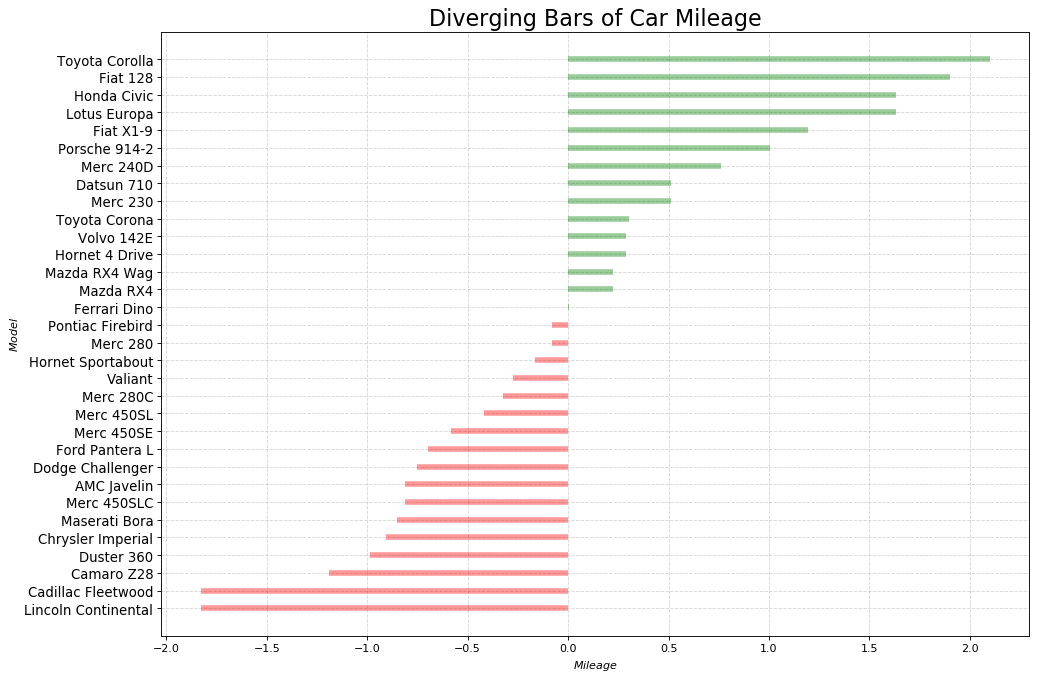

In [22]:
plt.figure(figsize=(14,10), dpi= 80)
plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z, color=df.colors, alpha=0.4, linewidth=5) #mpg_z e colors são variaveis
plt.gca().set(ylabel='$Model$', xlabel='$Mileage$')
plt.yticks(df.index, df.cars, fontsize=12) #index e cars sao variaveis
plt.title('Diverging Bars of Car Mileage', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.show()

# Grafico de Barras Ordenado

In [23]:
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
print(df_raw)

    manufacturer               model  displ  year  cyl       trans drv  cty  \
0           audi                  a4    1.8  1999    4    auto(l5)   f   18   
1           audi                  a4    1.8  1999    4  manual(m5)   f   21   
2           audi                  a4    2.0  2008    4  manual(m6)   f   20   
3           audi                  a4    2.0  2008    4    auto(av)   f   21   
4           audi                  a4    2.8  1999    6    auto(l5)   f   16   
5           audi                  a4    2.8  1999    6  manual(m5)   f   18   
6           audi                  a4    3.1  2008    6    auto(av)   f   18   
7           audi          a4 quattro    1.8  1999    4  manual(m5)   4   18   
8           audi          a4 quattro    1.8  1999    4    auto(l5)   4   16   
9           audi          a4 quattro    2.0  2008    4  manual(m6)   4   20   
10          audi          a4 quattro    2.0  2008    4    auto(s6)   4   19   
11          audi          a4 quattro    2.8  1999   

In [24]:
df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
df.sort_values('cty', inplace=True)
df.reset_index(inplace=True)
print(df)

   manufacturer        cty
0       lincoln  11.333333
1    land rover  11.500000
2         dodge  13.135135
3       mercury  13.250000
4          jeep  13.500000
5          ford  14.000000
6     chevrolet  15.000000
7       pontiac  17.000000
8          audi  17.611111
9        nissan  18.076923
10       toyota  18.529412
11      hyundai  18.642857
12       subaru  19.285714
13   volkswagen  20.925926
14        honda  24.444444


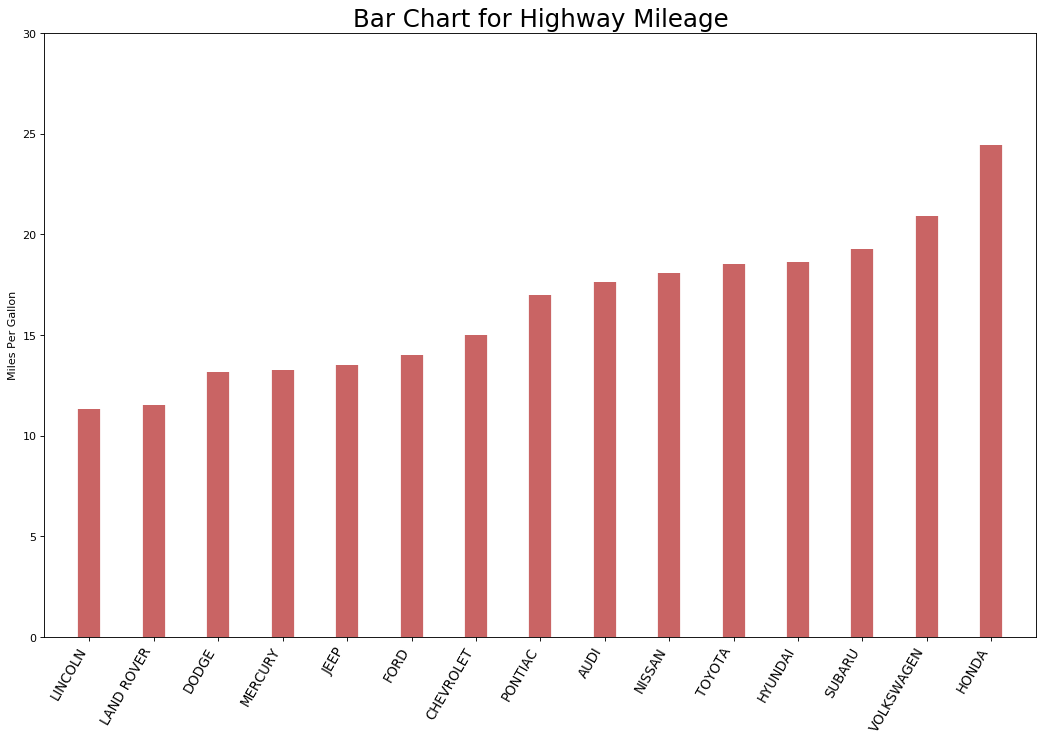

In [34]:
import matplotlib.patches as patches
fig, ax = plt.subplots(figsize=(16,10), facecolor='white', dpi= 80)
ax.vlines(x=df.index, ymin=0, ymax=df.cty, color='firebrick', alpha=0.7, linewidth=20) #cty é uma variavel da base
ax.set_title('Bar Chart for Highway Mileage', fontdict={'size':22})
ax.set(ylabel='Miles Per Gallon', ylim=(0, 30))
plt.xticks(df.index, df.manufacturer.str.upper(), rotation=60, horizontalalignment='right', fontsize=12) #manufacturer é uma variavel da base
plt.show()

# Grafico de Declive

In [12]:
import matplotlib.lines as mlines

In [8]:
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/gdppercap.csv")
left_label = [str(c) + ', '+ str(round(y)) for c, y in zip(df.continent, df['1952'])]
right_label = [str(c) + ', '+ str(round(y)) for c, y in zip(df.continent, df['1957'])]
klass = ['red' if (y1-y2) < 0 else 'green' for y1, y2 in zip(df['1952'], df['1957'])]
df.head()

,continent,1952,1957
0,Africa,1252.572466,1385.236062
1,Americas,4079.062552,4616.043733
2,Asia,5195.484004,4003.132940
3,Europe,5661.057435,6963.012816
4,Oceania,10298.085650,11598.522455


In [9]:
def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='red' if p1[1]-p2[1] > 0 else 'green', marker='o', markersize=6)
    ax.add_line(l)
    return l

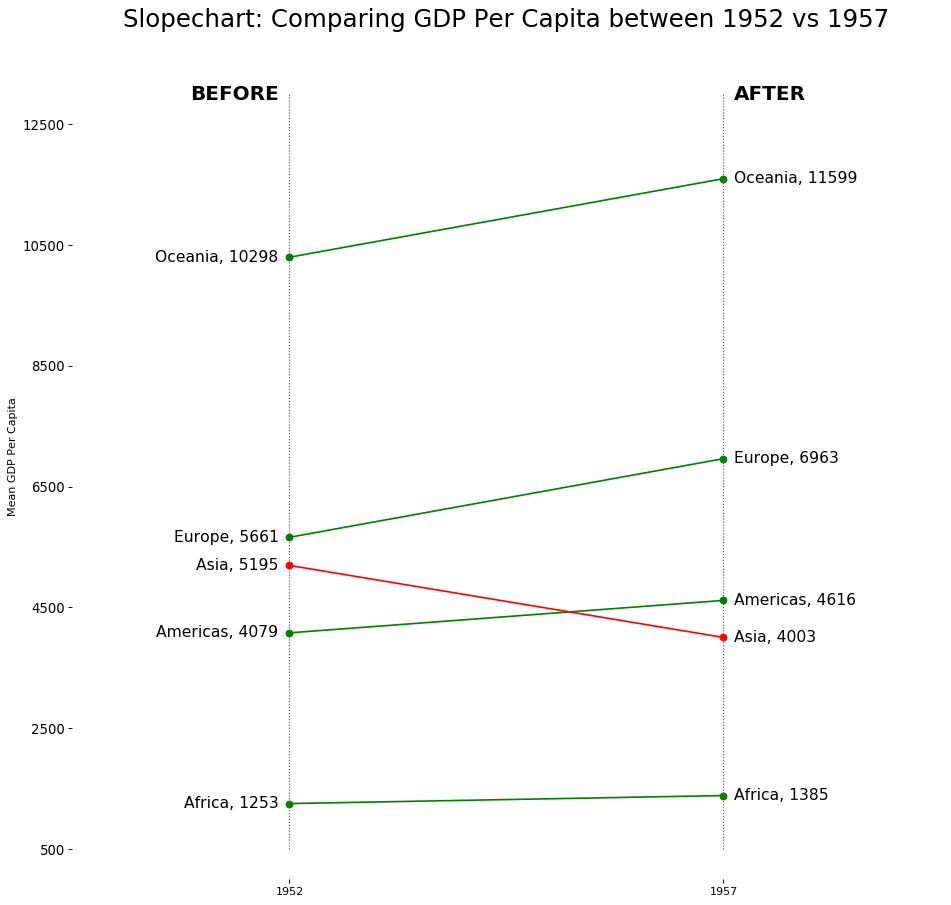

In [13]:
fig, ax = plt.subplots(1,1,figsize=(14,14), dpi= 80)
ax.vlines(x=1, ymin=500, ymax=13000, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=500, ymax=13000, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.scatter(y=df['1952'], x=np.repeat(1, df.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=df['1957'], x=np.repeat(3, df.shape[0]), s=10, color='black', alpha=0.7)
for p1, p2, c in zip(df['1952'], df['1957'], df['continent']):
    newline([1,p1], [3,p2])
    ax.text(1-0.05, p1, c + ', ' + str(round(p1)), horizontalalignment='right', verticalalignment='center', fontdict={'size':14})
    ax.text(3+0.05, p2, c + ', ' + str(round(p2)), horizontalalignment='left', verticalalignment='center', fontdict={'size':14})
ax.text(1-0.05, 13000, 'BEFORE', horizontalalignment='right', verticalalignment='center', fontdict={'size':18, 'weight':700})
ax.text(3+0.05, 13000, 'AFTER', horizontalalignment='left', verticalalignment='center', fontdict={'size':18, 'weight':700})
ax.set_title("Slopechart: Comparing GDP Per Capita between 1952 vs 1957", fontdict={'size':22})
ax.set(xlim=(0,4), ylim=(0,14000), ylabel='Mean GDP Per Capita')
ax.set_xticks([1,3])
ax.set_xticklabels(["1952", "1957"])
plt.yticks(np.arange(500, 13000, 2000), fontsize=12)
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.0)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.0)
plt.show()